C:\Users\somme\AppData\Local\Temp\ipykernel_8880\2959260509.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(ds.astype(np.int))


Episode: 0, Average Reward: -500.0
Episode: 100, Average Reward: -499.15
Episode: 200, Average Reward: -478.73
Episode: 300, Average Reward: -438.57
Episode: 400, Average Reward: -377.67
Episode: 500, Average Reward: -285.21
Episode: 600, Average Reward: -264.34
Episode: 700, Average Reward: -243.67
Episode: 800, Average Reward: -223.11
Episode: 900, Average Reward: -232.11


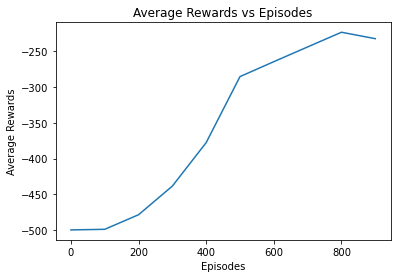

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from MountainCarEnv import MountainCarEnv

def discrete_state(state):
    ds = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(ds.astype(np.int))

env = MountainCarEnv(render_mode="rgb_array")
lr = 0.1
gamma = 0.95
num_episodes = 1000
display_interval = 100
discrete_size = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_size

# Exploration settings
eps = 0.5
start_eps_decay = 1
end_eps_decay = num_episodes // 2
eps_decay_val = eps / (end_eps_decay - start_eps_decay)

q_table = np.random.uniform(low=-2, high=0, size=(discrete_size + [env.action_space.n]))

rewards = []
avg_rewards = []

for ep in range(num_episodes):
    ds = discrete_state(env.reset())
    finished = False
    ep_rewards = 0

    while not finished:
        if np.random.random() > eps:
            act = np.argmax(q_table[ds])
        else:
            act = np.random.randint(0, env.action_space.n)

        next_state, rew, finished, _ = env.step(act)
        ep_rewards += rew
        next_ds = discrete_state(next_state)

        if not finished:
            max_next_q = np.max(q_table[next_ds])
            current_q = q_table[ds + (act,)]
            updated_q = (1 - lr) * current_q + lr * (rew + gamma * max_next_q)
            q_table[ds + (act,)] = updated_q
        elif next_state[0] >= env.goal_position:
            q_table[ds + (act,)] = 0

        ds = next_ds

    rewards.append(ep_rewards)

    if end_eps_decay >= ep >= start_eps_decay:
        eps -= eps_decay_val

    if ep % display_interval == 0:
        avg_reward = np.mean(rewards[-display_interval:])
        avg_rewards.append(avg_reward)
        print(f"Episode: {ep}, Average Reward: {avg_reward}")

env.close()

plt.plot(np.arange(0, num_episodes, display_interval), avg_rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()

In [ ]:
# Número de episodios de prueba
env = MountainCarEnv(render_mode="human")

# Test the learned Q-table
test_episodes = 5

for episode in range(test_episodes):
    ds = discrete_state(env.reset())
    finished = False
    step = 0

    print(f"Test Episode {episode + 1}")

    while not finished:
        action = np.argmax(q_table[ds])
        next_state, _, finished, _ = env.step(action)
        next_ds = discrete_state(next_state)
        env.render()
        ds = next_ds
        step += 1

    print(f"Episode {episode + 1} finished in {step} steps")

env.close()

# Plot the average rewards vs episodes
plt.plot(np.arange(0, num_episodes, display_interval), avg_rewards)
plt.xlabel("Episodes")
plt.ylabel("Average Rewards")
plt.title("Average Rewards vs Episodes")
plt.show()